In [2]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
import optuna
from sklearn import linear_model
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [158]:
train_df = pd.read_csv("/content/Train.csv")

In [159]:
train_df.shape

(86584, 14)

In [160]:
train_df.head(5)

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


In [161]:
train_df['Date'].unique()

array(['1/1/19', '2/1/19', '3/1/19', ..., '29-12-21', '30-12-21',
       '31-12-21'], dtype=object)

In [162]:
train_df['Date'] = pd.to_datetime(train_df['Date'], errors='coerce')

In [163]:
train_df.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,2019-01-01,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,2019-01-01,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,2019-01-01,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,2019-01-01,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,2019-01-01,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


In [164]:
train_df.query('NO2_trop	< 0')

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
28411,ID_YRJGZ0,2019-12-26,X5591,45.716300,10.044766,0.0,NaN,-1.120340,0.090115,0.000028,0.000024,-3.410000e-06,14416.17286,4.975
59612,ID_M33NQO,2021-01-24,X5568,45.730837,9.125734,0.0,279.66,-1.730232,0.159323,0.000031,0.000027,-3.790000e-06,22027.81204,11.650
59642,ID_ECQDLF,2021-01-24,X9969,45.842207,9.351658,0.0,NaN,-2.011505,0.158856,0.000031,0.000026,-5.060000e-06,22006.63457,8.425
59658,ID_ZJB463,2021-01-25,VR02,45.182626,11.310511,0.0,NaN,-1.951611,0.248553,0.000029,0.000051,-2.530000e-05,19283.91055,35.000
71124,ID_4NYULE,2021-06-19,X10458,45.233494,9.666250,0.0,NaN,-1.123964,0.286428,0.000059,0.000073,-3.650000e-07,14435.95410,9.200
72382,ID_GA49D9,2021-05-07,X10097,45.046502,11.180936,0.0,NaN,-1.161608,0.022313,0.000063,0.000060,-3.120000e-06,14430.02613,5.175


In [165]:
train_df['Day'] = train_df['Date'].dt.day

In [166]:
train_df['Month'] = train_df['Date'].dt.month
train_df['Year'] = train_df['Date'].dt.year

In [167]:
train_df.drop('Date',axis = 1,inplace=True)

In [168]:
train_df['ID'].value_counts()

ID
PD01      1096
X5591     1096
X5609     1096
X5607     1096
X5603     1096
          ... 
X10507    1096
X10458    1096
X10452    1096
X10331    1096
X9999     1096
Name: count, Length: 79, dtype: int64

In [169]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86584 entries, 0 to 86583
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Zindi            86584 non-null  object 
 1   ID                  86584 non-null  object 
 2   LAT                 86584 non-null  float64
 3   LON                 86584 non-null  float64
 4   Precipitation       86584 non-null  float64
 5   LST                 46798 non-null  float64
 6   AAI                 73709 non-null  float64
 7   CloudFraction       73709 non-null  float64
 8   NO2_strat           73709 non-null  float64
 9   NO2_total           73709 non-null  float64
 10  NO2_trop            51111 non-null  float64
 11  TropopausePressure  73709 non-null  float64
 12  GT_NO2              82051 non-null  float64
 13  Day                 86584 non-null  int32  
 14  Month               86584 non-null  int32  
 15  Year                86584 non-null  int32  
dtypes: f

In [170]:
train_df.tail(20)

,ID_Zindi,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2,Day,Month,Year
86564,ID_DFI0QN,X5611,45.159373,9.698148,0.0,NaN,-1.537893,0.284638,0.000032,0.000400,NaN,13065.14930,25.175,31,12,2021
86565,ID_A4BI2F,X5950,45.278488,10.006202,0.0,NaN,-1.089471,0.344780,0.000032,0.000407,NaN,13065.05908,20.175,31,12,2021
86566,ID_PVTBLC,X5958,45.366309,9.703946,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.025,31,12,2021
86567,ID_V14WM5,X5965,45.283977,9.863398,0.0,NaN,-1.098018,0.297598,0.000032,0.000384,NaN,13065.00600,25.900,31,12,2021
86568,ID_NABILT,X6685,45.194676,9.164638,0.0,NaN,-1.026156,0.476533,0.000031,0.000751,NaN,13063.22661,33.875,31,12,2021
86569,ID_9QP7Y8,X6781,45.539529,10.231786,0.0,284.40,-0.297831,0.004217,0.000031,0.000176,0.000145,13059.45932,53.075,31,12,2021
86570,ID_WUKZNU,X6813,45.249544,10.299119,0.0,NaN,-1.037367,0.359459,0.000031,0.000555,NaN,13064.80943,34.475,31,12,2021
86571,ID_GBSIG7,X6826,45.463753,10.480772,0.0,283.54,-0.613807,0.033910,0.000031,0.000241,0.000210,13063.23622,34.500,31,12,2021
86572,ID_OJ173N,X6859,45.515708,10.336240,0.0,282.10,-0.058019,0.000036,0.000031,0.000212,0.000180,13060.58817,36.325,31,12,2021
86573,ID_EUPODO,X6871,45.145260,10.803326,0.0,273.42,-0.916674,0.510518,0.000032,0.000556,NaN,13063.69438,27.300,31,12,2021


In [171]:
#EDA AND FILLING NULL VALUES

In [172]:
train_df['LST'].median()

300.76

In [173]:
train_df.columns

Index(['ID_Zindi', 'ID', 'LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop',
       'TropopausePressure', 'GT_NO2', 'Day', 'Month', 'Year'],
      dtype='object')

VISUALIZATION USING BOXPLOT AND IQR CALCULATION FOR FINDING OUTLIERS IN THE DATASET

In [174]:
train_df['LST'].describe()

count    46798.000000
mean       299.268841
std         10.927167
min        253.200000
25%        290.920000
50%        300.760000
75%        307.940000
max        327.840000
Name: LST, dtype: float64

In [175]:
#train_df['LST'] = train_df['LST'].fillna(train_df['LST'].median())

In [176]:
#train_df['AAI'].describe()

In [177]:
#train_df['AAI'] = train_df['AAI'].fillna(train_df['AAI'].median())

In [178]:
#train_df['CloudFraction'] = train_df['CloudFraction'].fillna(train_df['CloudFraction'].median())

In [179]:
#train_df['NO2_strat'] = train_df['NO2_strat'].fillna(train_df['NO2_strat'].median())

In [180]:
#train_df['NO2_total'] = train_df['NO2_total'].fillna(train_df['NO2_total'].median())

In [181]:
#train_df['NO2_trop'] = train_df['NO2_trop'].fillna(train_df['NO2_total']-train_df['NO2_strat'])

In [182]:
#train_df['TropopausePressure'] =  train_df['TropopausePressure'].fillna(train_df['TropopausePressure'].median())

In [183]:
#train_df['GT_NO2'] =  train_df['GT_NO2'].fillna(train_df['GT_NO2'].median())

In [184]:
#sns.heatmap(train_df.isnull(),cbar=False)

In [185]:
train_df.columns

Index(['ID_Zindi', 'ID', 'LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop',
       'TropopausePressure', 'GT_NO2', 'Day', 'Month', 'Year'],
      dtype='object')

In [186]:
train_df['ID'].value_counts()

ID
PD01      1096
X5591     1096
X5609     1096
X5607     1096
X5603     1096
          ... 
X10507    1096
X10458    1096
X10452    1096
X10331    1096
X9999     1096
Name: count, Length: 79, dtype: int64

In [187]:
#train_df[['ID_code', 'ID_value']] = train_df['ID'].str.extract(r'([A-Za-z]+)(\d+)')

In [188]:
train_df.drop('ID',axis = 1,inplace=True)

In [189]:
#train_df['ID_value'] = train_df['ID_value'].astype(int)

In [190]:
#train_df = train_df.drop('ID_Zindi',axis = 1)

In [191]:
#Label Encoding the categorical data

In [192]:
train_df.dtypes

ID_Zindi               object
LAT                   float64
LON                   float64
Precipitation         float64
LST                   float64
AAI                   float64
CloudFraction         float64
NO2_strat             float64
NO2_total             float64
NO2_trop              float64
TropopausePressure    float64
GT_NO2                float64
Day                     int32
Month                   int32
Year                    int32
dtype: object

In [193]:
train_df.isnull().sum()

ID_Zindi                  0
LAT                       0
LON                       0
Precipitation             0
LST                   39786
AAI                   12875
CloudFraction         12875
NO2_strat             12875
NO2_total             12875
NO2_trop              35473
TropopausePressure    12875
GT_NO2                 4533
Day                       0
Month                     0
Year                      0
dtype: int64

In [194]:
new_df = train_df[['LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total',
       'TropopausePressure', 'GT_NO2', 'Day', 'Month', 'Year']]

In [195]:
knn = KNNImputer(n_neighbors=5,weights='distance')
new_df_trf = knn.fit_transform(new_df)

In [196]:
new_df_trf = pd.DataFrame(new_df_trf,columns=new_df.columns)

In [197]:
new_df_trf['NO2_trop'] = train_df['NO2_trop']

In [198]:
new_df_trf.head()

,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,TropopausePressure,GT_NO2,Day,Month,Year,NO2_trop
0,45.601585,11.903551,0.000000,282.546835,0.230527,0.559117,0.000024,0.000117,14440.82126,31.0,1.0,1.0,2019.0,NaN
1,45.371005,11.840830,3.047342,280.390662,-0.074006,0.869309,0.000024,0.000127,14441.79815,42.0,1.0,1.0,2019.0,NaN
2,45.045825,12.060869,0.000000,282.394977,0.024470,0.674160,0.000024,0.000086,14437.38294,31.0,1.0,1.0,2019.0,NaN
3,45.104075,11.553241,1.200467,282.522163,-0.010442,0.920054,0.000024,0.000124,14440.83831,30.0,1.0,1.0,2019.0,NaN
4,45.038758,11.790152,1.274564,282.642766,-0.176178,0.747464,0.000024,0.000116,14438.79037,58.0,1.0,1.0,2019.0,NaN


In [199]:
new_df_trf = new_df_trf[['LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total','NO2_trop',
       'TropopausePressure', 'GT_NO2', 'Day', 'Month', 'Year']]

In [200]:
new_df_trf

,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2,Day,Month,Year
0,45.601585,11.903551,0.000000,282.546835,0.230527,0.559117,0.000024,0.000117,NaN,14440.821260,31.000,1.0,1.0,2019.0
1,45.371005,11.840830,3.047342,280.390662,-0.074006,0.869309,0.000024,0.000127,NaN,14441.798150,42.000,1.0,1.0,2019.0
2,45.045825,12.060869,0.000000,282.394977,0.024470,0.674160,0.000024,0.000086,NaN,14437.382940,31.000,1.0,1.0,2019.0
3,45.104075,11.553241,1.200467,282.522163,-0.010442,0.920054,0.000024,0.000124,NaN,14440.838310,30.000,1.0,1.0,2019.0
4,45.038758,11.790152,1.274564,282.642766,-0.176178,0.747464,0.000024,0.000116,NaN,14438.790370,58.000,1.0,1.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86579,45.498227,9.556232,0.000000,275.463360,-0.434350,0.250490,0.000032,0.000643,NaN,13063.797700,39.750,31.0,12.0,2021.0
86580,45.142541,10.043836,0.000000,279.648648,-0.789369,0.270153,0.000031,0.000477,NaN,17136.562057,30.125,31.0,12.0,2021.0
86581,45.842207,9.351658,0.000000,284.980000,-0.157753,0.000000,0.000031,0.000153,0.000122,13050.164990,28.325,31.0,12.0,2021.0
86582,45.113503,8.874065,0.000000,283.990869,-0.798636,0.399524,0.000031,0.000717,NaN,13061.413290,21.250,31.0,12.0,2021.0


In [201]:
new_df_trf['NO2_trop'] = new_df_trf['NO2_trop'].fillna(new_df_trf['NO2_total']-new_df_trf['NO2_strat'])

In [202]:
new_df_trf

,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2,Day,Month,Year
0,45.601585,11.903551,0.000000,282.546835,0.230527,0.559117,0.000024,0.000117,0.000093,14440.821260,31.000,1.0,1.0,2019.0
1,45.371005,11.840830,3.047342,280.390662,-0.074006,0.869309,0.000024,0.000127,0.000103,14441.798150,42.000,1.0,1.0,2019.0
2,45.045825,12.060869,0.000000,282.394977,0.024470,0.674160,0.000024,0.000086,0.000062,14437.382940,31.000,1.0,1.0,2019.0
3,45.104075,11.553241,1.200467,282.522163,-0.010442,0.920054,0.000024,0.000124,0.000100,14440.838310,30.000,1.0,1.0,2019.0
4,45.038758,11.790152,1.274564,282.642766,-0.176178,0.747464,0.000024,0.000116,0.000092,14438.790370,58.000,1.0,1.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86579,45.498227,9.556232,0.000000,275.463360,-0.434350,0.250490,0.000032,0.000643,0.000611,13063.797700,39.750,31.0,12.0,2021.0
86580,45.142541,10.043836,0.000000,279.648648,-0.789369,0.270153,0.000031,0.000477,0.000446,17136.562057,30.125,31.0,12.0,2021.0
86581,45.842207,9.351658,0.000000,284.980000,-0.157753,0.000000,0.000031,0.000153,0.000122,13050.164990,28.325,31.0,12.0,2021.0
86582,45.113503,8.874065,0.000000,283.990869,-0.798636,0.399524,0.000031,0.000717,0.000686,13061.413290,21.250,31.0,12.0,2021.0


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [204]:
new_df_trf.head(5)

,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2,Day,Month,Year
0,45.601585,11.903551,0.000000,282.546835,0.230527,0.559117,0.000024,0.000117,0.000093,14440.82126,31.0,1.0,1.0,2019.0
1,45.371005,11.840830,3.047342,280.390662,-0.074006,0.869309,0.000024,0.000127,0.000103,14441.79815,42.0,1.0,1.0,2019.0
2,45.045825,12.060869,0.000000,282.394977,0.024470,0.674160,0.000024,0.000086,0.000062,14437.38294,31.0,1.0,1.0,2019.0
3,45.104075,11.553241,1.200467,282.522163,-0.010442,0.920054,0.000024,0.000124,0.000100,14440.83831,30.0,1.0,1.0,2019.0
4,45.038758,11.790152,1.274564,282.642766,-0.176178,0.747464,0.000024,0.000116,0.000092,14438.79037,58.0,1.0,1.0,2019.0


In [203]:
new_df_trf.columns

Index(['LAT', 'LON', 'Precipitation', 'LST', 'AAI', 'CloudFraction',
       'NO2_strat', 'NO2_total', 'NO2_trop', 'TropopausePressure', 'GT_NO2',
       'Day', 'Month', 'Year'],
      dtype='object')

In [205]:
new_df_trf['Precipitation'].skew()

4.569618429259263

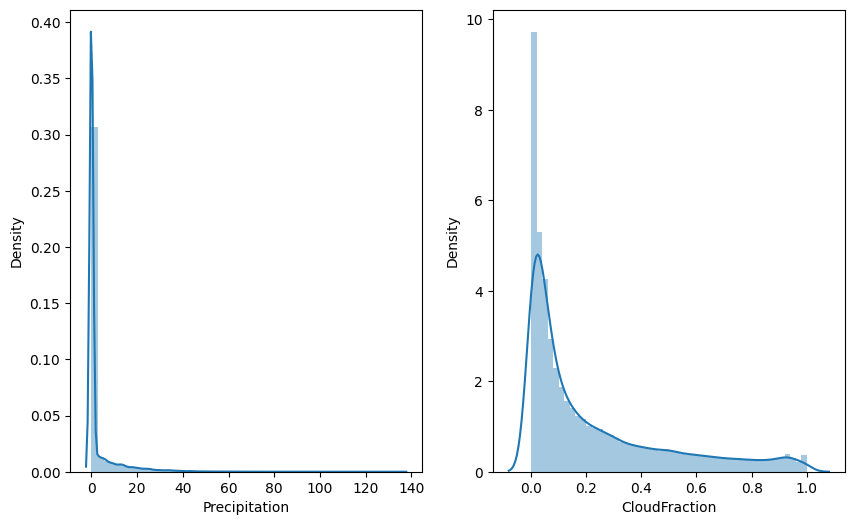

In [39]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(new_df_trf['Precipitation'])
plt.subplot(1,2,2)
sns.distplot(new_df_trf['CloudFraction'])
plt.show()

In [40]:
new_df_trf['CloudFraction'].describe()

count    86584.000000
mean         0.222186
std          0.260870
min          0.000000
25%          0.030235
50%          0.104986
75%          0.333449
max          1.000000
Name: CloudFraction, dtype: float64

<Axes: ylabel='CloudFraction'>

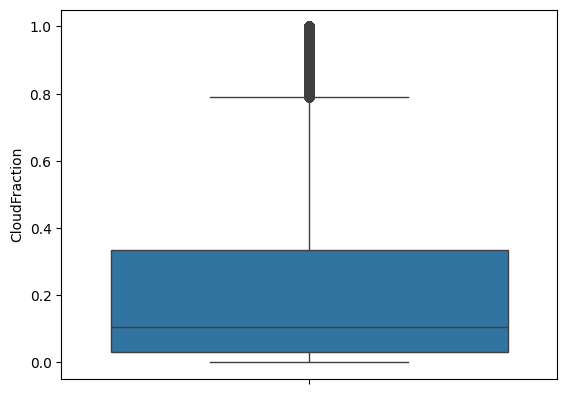

In [41]:
sns.boxplot(new_df_trf['CloudFraction'])

In [206]:
#percentile25 = new_df_trf['CloudFraction'].quantile(0.25)
#percentile75 = new_df_trf['CloudFraction'].quantile(0.75)
#iqr = percentile75 - percentile25

In [207]:
#upper_limit = percentile75 + 1.5 * iqr
#lower_limit = percentile25 - 1.5 * iqr

In [208]:
#lower_limit

In [209]:
#upper_limit

In [210]:
#new_df_trf[new_df_trf['CloudFraction'] > upper_limit]

In [211]:
#new_df_trf['CloudFraction'] = np.where(new_df_trf['CloudFraction'] > upper_limit, upper_limit, new_df_trf['CloudFraction'])

In [212]:
#new_df_trf

In [213]:
#new_df_trf['NO2_total'].describe()

In [214]:
#sns.boxplot(new_df_trf['NO2_total'])

In [215]:
#percentile25 = new_df_trf['NO2_trop'].quantile(0.25)
#percentile75 = new_df_trf['NO2_trop'].quantile(0.75)
#iqr = percentile75 - percentile25

In [216]:
#upper_limit = percentile75 + 1.5 * iqr
#lower_limit = percentile25 - 1.5 * iqr

In [217]:
#lower_limit

In [218]:
#new_df_trf['NO2_total'] = np.where(new_df_trf['NO2_total'] < 0 , 0, new_df_trf['NO2_total'])

In [219]:
#new_df_trf.query('NO2_total < 0')

In [220]:
#new_df_trf['No2_trop'] = np.where(new_df_trf['NO2_trop'] < 0 , 0, new_df_trf['NO2_trop'])

In [221]:
#new_df_trf.isnull().sum()

In [222]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
imp_col = new_df_trf[['LAT','LON','Precipitation','LST','AAI','CloudFraction','NO2_strat','NO2_total','NO2_trop','TropopausePressure','Day','Month','Year']]

In [223]:
new_df_trf.isnull().sum()

LAT                   0
LON                   0
Precipitation         0
LST                   0
AAI                   0
CloudFraction         0
NO2_strat             0
NO2_total             0
NO2_trop              0
TropopausePressure    0
GT_NO2                0
Day                   0
Month                 0
Year                  0
dtype: int64

In [224]:
scaled_data = scaler.fit_transform(new_df_trf[imp_col.columns].values.reshape(-1, len(imp_col.columns)))
new_df_trf[imp_col.columns] = scaled_data

In [226]:
new_df_trf.head()

,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2,Day,Month,Year
0,0.799122,1.788021,-0.339426,-1.424007,2.228651,1.291575,-1.627069,-0.442631,-0.230779,-0.789609,31.0,-1.673906,-1.601021,-1.225304
1,-0.223822,1.728662,0.060627,-1.624941,1.773040,2.480649,-1.619046,-0.346432,-0.140648,-0.789273,42.0,-1.673906,-1.601021,-1.225304
2,-1.666448,1.936908,-0.339426,-1.438158,1.920370,1.732577,-1.611022,-0.738923,-0.513006,-0.790792,31.0,-1.673906,-1.601021,-1.225304
3,-1.408029,1.456486,-0.181830,-1.426306,1.868139,2.675172,-1.602998,-0.375292,-0.169781,-0.789604,30.0,-1.673906,-1.601021,-1.225304
4,-1.697798,1.680700,-0.172102,-1.415067,1.620181,2.013574,-1.602998,-0.452251,-0.242614,-0.790308,58.0,-1.673906,-1.601021,-1.225304


In [228]:
from sklearn.model_selection import train_test_split
x = new_df_trf[['LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop',
       'TropopausePressure','Day', 'Month', 'Year']]
y = new_df_trf['GT_NO2']

In [229]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [230]:
def objective(trial):
    params = {
       'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
       'max_depth': trial.suggest_int('max_depth', 3, 10),
       'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
       'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1e2),
       'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 1e2),
       'subsample': trial.suggest_uniform('subsample', 0.6, 0.95),
       'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.95),
       'random_state': 42,
        'objective': 'reg:squarederror'
    }
    model = xgb.XGBRegressor(**params)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    return mse

In [233]:
study = optuna.create_study(direction = 'minimize')
study.optimize(objective, n_trials=70)

[I 2024-07-18 03:48:57,908] A new study created in memory with name: no-name-8cfed9f3-47c7-40f4-b748-da1bb3dc1531
[I 2024-07-18 03:49:09,770] Trial 0 finished with value: 64.99783374511551 and parameters: {'n_estimators': 900, 'max_depth': 7, 'learning_rate': 0.009295522943392837, 'reg_alpha': 0.004462278602099596, 'reg_lambda': 1.1191626276653303e-05, 'subsample': 0.8153716154473402, 'colsample_bytree': 0.7721384224752756}. Best is trial 0 with value: 64.99783374511551.
[I 2024-07-18 03:49:46,473] Trial 1 finished with value: 47.45354487283615 and parameters: {'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.04414771867180396, 'reg_alpha': 4.720318131858861, 'reg_lambda': 0.7996154657382378, 'subsample': 0.8758475313779153, 'colsample_bytree': 0.7608487361882283}. Best is trial 1 with value: 47.45354487283615.
[I 2024-07-18 03:49:56,094] Trial 2 finished with value: 70.2754903726364 and parameters: {'n_estimators': 700, 'max_depth': 7, 'learning_rate': 0.008374041968592967, '

In [234]:
print('Best Hyperparameters:',study.best_params)
print('Best MSE:',study.best_value)

Best Hyperparameters: {'n_estimators': 900, 'max_depth': 10, 'learning_rate': 0.038978316316611784, 'reg_alpha': 9.177655234433503, 'reg_lambda': 5.841460747975509, 'subsample': 0.6936940634255055, 'colsample_bytree': 0.8168800142463213}
Best MSE: 47.33948741587861


In [235]:
best_params = study.best_params

In [236]:
optimized_model = XGBRegressor(**best_params)

In [237]:
optimized_model.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8168800142463213, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.038978316316611784, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
##TESTIN RANDOM FOREST REGRESSOR

In [ ]:
#from xgboost import XGBRegressor

In [ ]:
#model = XGBRegressor(n_estimators = 1100)

In [ ]:
#model.fit(x_train,y_train)

In [238]:
y_pred = optimized_model.predict(x_test)

In [239]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [240]:
rmse

3.2624329444323554

TEST FILE

In [241]:
test_df = pd.read_csv("/content/Test.csv")

In [242]:
test_df.shape

(6576, 13)

In [243]:
test_df['Date'] = pd.to_datetime(test_df['Date'], errors='coerce')

In [244]:
test_df['Day'] = test_df['Date'].dt.day
test_df['Month'] = test_df['Date'].dt.month
test_df['Year'] = test_df['Date'].dt.year

In [245]:
test_df.drop('Date',axis = 1,inplace=True)

In [246]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Zindi            6576 non-null   object 
 1   ID                  6576 non-null   object 
 2   LAT                 6576 non-null   float64
 3   LON                 6576 non-null   float64
 4   Precipitation       6576 non-null   float64
 5   LST                 3595 non-null   float64
 6   AAI                 5708 non-null   float64
 7   CloudFraction       5708 non-null   float64
 8   NO2_strat           5708 non-null   float64
 9   NO2_total           5708 non-null   float64
 10  NO2_trop            3998 non-null   float64
 11  TropopausePressure  5708 non-null   float64
 12  Day                 6576 non-null   int32  
 13  Month               6576 non-null   int32  
 14  Year                6576 non-null   int32  
dtypes: float64(10), int32(3), object(2)
memory usage: 693.7

In [247]:
test_df['ID'].unique()

array(['PD03', 'TV03', 'X5561', 'X5953', 'X6701', 'X6877'], dtype=object)

In [248]:
#test_df[['ID_code', 'ID_value']] = test_df['ID'].str.extract(r'([A-Za-z]+)(\d+)')

In [249]:
test_df.drop('ID',axis = 1,inplace=True)

In [131]:
#test_df['ID_value'] = test_df['ID_value'].astype(int)

In [132]:
#test_df['LST'] = test_df['LST'].fillna(test_df['LST'].median())

In [ ]:
#test_df['AAI'] = test_df['AAI'].fillna(test_df['AAI'].median())

In [ ]:
#test_df['CloudFraction'] = test_df['CloudFraction'].fillna(test_df['CloudFraction'].median())

In [ ]:
#test_df['NO2_strat'] = test_df['NO2_strat'].fillna(test_df['NO2_strat'].median())

In [ ]:
#test_df['NO2_total'] = test_df['NO2_total'].fillna(test_df['NO2_total'].median())

In [ ]:
#test_df['NO2_trop'] = test_df['NO2_trop'].fillna(test_df['NO2_total']-test_df['NO2_strat'])

In [ ]:
#test_df['TropopausePressure'] =  test_df['TropopausePressure'].fillna(test_df['TropopausePressure'].median())

In [250]:
new_test = test_df[['LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total',
       'TropopausePressure', 'Day', 'Month', 'Year']]

In [251]:
new_test_trf = knn.fit_transform(new_test)

In [252]:
new_test_trf = pd.DataFrame(new_test_trf,columns=new_test.columns)

In [253]:
new_test_trf['NO2_trop'] = test_df['NO2_trop']

In [254]:
new_test_trf = new_test_trf[['LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total','NO2_trop',
       'TropopausePressure', 'Day', 'Month', 'Year']]

In [255]:
new_test_trf['NO2_trop'] = new_test_trf['NO2_trop'].fillna(new_test_trf['NO2_total']-new_test_trf['NO2_strat'])

In [139]:
#new_test_trf['NO2_trop'] = np.where(new_test_trf['NO2_trop'] < 0 , 0, new_test_trf['NO2_trop'])

In [140]:
#new_test_trf['NO2_total'] = np.where(new_test_trf['NO2_total'] < 0 , 0, new_test_trf['NO2_total'])

In [141]:
#test_df['ID_code'] = le.fit_transform(test_df['ID_code'])

In [142]:
#test_df = test_df.drop('ID_Zindi',axis = 1)

In [256]:
new_test_trf.isnull().sum()

LAT                   0
LON                   0
Precipitation         0
LST                   0
AAI                   0
CloudFraction         0
NO2_strat             0
NO2_total             0
NO2_trop              0
TropopausePressure    0
Day                   0
Month                 0
Year                  0
dtype: int64

In [257]:
test_df.columns

Index(['ID_Zindi', 'LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop',
       'TropopausePressure', 'Day', 'Month', 'Year'],
      dtype='object')

In [258]:
cols_to_transform = new_test_trf[['LAT','LON','Precipitation','LST','AAI','CloudFraction','NO2_strat','NO2_total','NO2_trop','TropopausePressure','Day','Month','Year']]

In [259]:
scaled_data_test= scaler.fit_transform(new_test_trf[cols_to_transform.columns].values.reshape(-1, len(cols_to_transform.columns)))
new_test_trf[cols_to_transform.columns] = scaled_data_test

In [260]:
new_test_trf.query('TropopausePressure == 3')

,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,Day,Month,Year


In [261]:
values = new_test_trf[['LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop',
       'TropopausePressure', 'Day', 'Month', 'Year']]

In [262]:
target_pred = optimized_model.predict(values)

In [263]:
target_pred

array([35.68694 , 31.46176 , 32.57197 , ..., 32.418686, 28.299917,
       28.18883 ], dtype=float32)

In [264]:
new_test_trf['GT_NO2'] = target_pred

In [265]:
new_test_trf['ID_Zindi'] = test_df['ID_Zindi']

In [266]:
submission = new_test_trf.drop(['LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop',
       'TropopausePressure', 'Day', 'Month', 'Year'],axis='columns')

In [267]:
submission = submission[['ID_Zindi', 'GT_NO2']]

In [268]:
submission

,ID_Zindi,GT_NO2
0,ID_2MYNQS,35.686939
1,ID_P4U5WU,31.461760
2,ID_U4KWPK,32.571972
3,ID_QGSNTZ,33.428600
4,ID_GHSZ6K,31.476683
...,...,...
6571,ID_GUSXU9,31.285496
6572,ID_GMVEG1,37.632206
6573,ID_GD6HNP,32.418686
6574,ID_J7YW1Y,28.299917


In [269]:
submission.shape

(6576, 2)

In [270]:
submission.to_csv("final_submission_13.csv",index=False)